# Activity 7: Optimizing a deep learning model
In this activity we optimize our deep learning model. We aim to achieve greater performance than our model `bitcoin_lstm_v0`, which is off at about 6.8% from the real Bitcoin prices. We explore the following topics in this notebook:

* Experimenting with different layers and the number of nodes
* Grid search strategy for epoch and activation functions

## Load Data

In [2]:
%autosave 5

#  Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from datetime import datetime, timedelta
from keras.models import load_model, Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout, ActivityRegularization
from keras.callbacks import TensorBoard

from utilities_activity7 import (
    create_groups, split_lstm_input, 
    train_model, plot_two_series, rmse, 
    mape, denormalize)

np.random.seed(0)

Autosaving every 5 seconds


In [4]:
#  Load datasets
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [5]:
#  Convert `date` column to datetime type
test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [6]:
#  Group data into groups containing seven observations
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)
test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [7]:
#  Reshape the data in the format expected by the LSTM layer
X_train, Y_train = split_lstm_input(train_data)

## Reference Model

In [8]:
#  TASK:
#  Load data for `v0` of our model.
#  Call this `model_v0`.
model_vo=load_model('bitcoin_lstm_v0.h5')




Instructions for updating:
keep_dims is deprecated, use keepdims instead









In [11]:
%%time

#  TASK:
#  Train the reference model `model_v0`.
#
train_model(model_vo,X=X_train,Y=Y_train,epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




Epoch 1/100

1/1 [==============================] - 1s 712ms/step - loss: 0.0027
Epoch 2/100
1/1 [==============================] - 0s 85ms/step - loss: 0.0023
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0020
Epoch 4/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0018
Epoch 5/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0016
Epoch 6/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0015
Epoch 7/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0013
Epoch 8/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0012
Epoch 9/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0011
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss

Epoch 81/100
1/1 [==============================] - 0s 79ms/step - loss: 3.9479e-06
Epoch 82/100
1/1 [==============================] - 0s 79ms/step - loss: 4.3135e-06
Epoch 83/100
1/1 [==============================] - 0s 70ms/step - loss: 4.8482e-06
Epoch 84/100
1/1 [==============================] - 0s 82ms/step - loss: 5.2715e-06
Epoch 85/100
1/1 [==============================] - 0s 77ms/step - loss: 5.6736e-06
Epoch 86/100
1/1 [==============================] - 0s 79ms/step - loss: 5.7197e-06
Epoch 87/100
1/1 [==============================] - 0s 76ms/step - loss: 5.6560e-06
Epoch 88/100
1/1 [==============================] - 0s 81ms/step - loss: 5.2840e-06
Epoch 89/100
1/1 [==============================] - 0s 85ms/step - loss: 4.9697e-06
Epoch 90/100
1/1 [==============================] - 0s 85ms/step - loss: 4.5685e-06
Epoch 91/100
1/1 [==============================] - 0s 87ms/step - loss: 4.3556e-06
Epoch 92/100
1/1 [==============================] - 0s 83ms/step - loss: 4.1

## Adding Layers and Nodes

In [12]:
#  Initialize variables
period_length = 7
number_of_periods = 76
batch_size = 1

In [13]:
#  Model 1: two LSTM layers
model_v1 = Sequential()

model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))   # note return_sequences is now true

#  TASK:
#  Add new LSTM layer to this network here.
model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))


model_v1.add(Dense(units=period_length))
model_v1.add(Activation("linear"))

model_v1.compile(loss="mse", optimizer="rmsprop")

In [14]:
%%time
train_model(model=model_v1, X=X_train, Y=Y_train, epochs=100, version=1, run_number=0)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0047
Epoch 2/100
1/1 [==============================] - 0s 141ms/step - loss: 0.0034
Epoch 3/100
1/1 [==============================] - 0s 138ms/step - loss: 0.0028
Epoch 4/100
1/1 [==============================] - 0s 143ms/step - loss: 0.0024
Epoch 5/100
1/1 [==============================] - 0s 132ms/step - loss: 0.0021
Epoch 6/100
1/1 [==============================] - 0s 131ms/step - loss: 0.0019
Epoch 7/100
1/1 [==============================] - 0s 137ms/step - loss: 0.0017
Epoch 8/100
1/1 [==============================] - 0s 112ms/step - loss: 0.0015
Epoch 9/100
1/1 [==============================] - 0s 119ms/step - loss: 0.0014
Epoch 10/100
1/1 [==============================] - 0s 114ms/step - loss: 0.0012
Epoch 11/100
1/1 [==============================] - 0s 116ms/step - loss: 0.0011
Epoch 12/100
1/1 [==============================] - 0s 118ms/step - loss: 0.0010
Epoch 13/100
1/1 [======================

Epoch 99/100
1/1 [==============================] - 0s 108ms/step - loss: 9.3916e-06
Epoch 100/100
1/1 [==============================] - 0s 117ms/step - loss: 8.3458e-06
Wall time: 15.5 s


## Epochs

In [15]:
# Model 2: two LSTM layers, trained for 300 epochs
model_v2 = Sequential()

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v2.add(Dense(units=period_length))
model_v2.add(Activation("linear"))

model_v2.compile(loss="mse", optimizer="rmsprop")

In [18]:
%%time

#  TASK:
#  Change the number of epochs below
#  to 300 and evaluate the results on TensorBoard.
#
train_model(model=model_v2, X=X_train, Y=Y_train, epochs=300, version=2, run_number=0)
TensorBoard(log_dir=f'./logs/model_v2')

Epoch 1/300
1/1 [==============================] - 0s 180ms/step - loss: 1.3166e-06
Epoch 2/300
1/1 [==============================] - 0s 131ms/step - loss: 1.5857e-06
Epoch 3/300
1/1 [==============================] - 0s 122ms/step - loss: 2.4338e-06
Epoch 4/300
1/1 [==============================] - 0s 107ms/step - loss: 3.9498e-06
Epoch 5/300
1/1 [==============================] - 0s 113ms/step - loss: 6.2776e-06
Epoch 6/300
1/1 [==============================] - 0s 115ms/step - loss: 6.6401e-06
Epoch 7/300
1/1 [==============================] - 0s 113ms/step - loss: 5.5746e-06
Epoch 8/300
1/1 [==============================] - 0s 118ms/step - loss: 3.6449e-06
Epoch 9/300
1/1 [==============================] - 0s 115ms/step - loss: 2.4561e-06
Epoch 10/300
1/1 [==============================] - 0s 117ms/step - loss: 1.6382e-06
Epoch 11/300
1/1 [==============================] - 0s 114ms/step - loss: 1.2080e-06
Epoch 12/300
1/1 [==============================] - 0s 115ms/step - loss: 

Epoch 98/300
1/1 [==============================] - 0s 116ms/step - loss: 2.7528e-06
Epoch 99/300
1/1 [==============================] - 0s 113ms/step - loss: 1.9894e-06
Epoch 100/300
1/1 [==============================] - 0s 114ms/step - loss: 1.5216e-06
Epoch 101/300
1/1 [==============================] - 0s 115ms/step - loss: 1.4791e-06
Epoch 102/300
1/1 [==============================] - 0s 114ms/step - loss: 1.5005e-06
Epoch 103/300
1/1 [==============================] - 0s 112ms/step - loss: 1.6729e-06
Epoch 104/300
1/1 [==============================] - 0s 117ms/step - loss: 1.7052e-06
Epoch 105/300
1/1 [==============================] - 0s 113ms/step - loss: 1.7579e-06
Epoch 106/300
1/1 [==============================] - 0s 116ms/step - loss: 1.6232e-06
Epoch 107/300
1/1 [==============================] - 0s 117ms/step - loss: 1.5502e-06
Epoch 108/300
1/1 [==============================] - 0s 110ms/step - loss: 1.4003e-06
Epoch 109/300
1/1 [==============================] - 0s 

Epoch 194/300
1/1 [==============================] - 0s 117ms/step - loss: 3.3906e-06
Epoch 195/300
1/1 [==============================] - 0s 112ms/step - loss: 2.3107e-06
Epoch 196/300
1/1 [==============================] - 0s 115ms/step - loss: 1.5871e-06
Epoch 197/300
1/1 [==============================] - 0s 117ms/step - loss: 1.2915e-06
Epoch 198/300
1/1 [==============================] - 0s 113ms/step - loss: 1.1294e-06
Epoch 199/300
1/1 [==============================] - 0s 118ms/step - loss: 1.0930e-06
Epoch 200/300
1/1 [==============================] - 0s 114ms/step - loss: 1.1045e-06
Epoch 201/300
1/1 [==============================] - 0s 113ms/step - loss: 1.1739e-06
Epoch 202/300
1/1 [==============================] - 0s 114ms/step - loss: 1.2693e-06
Epoch 203/300
1/1 [==============================] - 0s 115ms/step - loss: 1.4018e-06
Epoch 204/300
1/1 [==============================] - 0s 117ms/step - loss: 1.5496e-06
Epoch 205/300
1/1 [==============================] - 0

Epoch 290/300
1/1 [==============================] - 0s 116ms/step - loss: 2.4158e-06
Epoch 291/300
1/1 [==============================] - 0s 110ms/step - loss: 2.9107e-06
Epoch 292/300
1/1 [==============================] - 0s 117ms/step - loss: 3.0650e-06
Epoch 293/300
1/1 [==============================] - 0s 113ms/step - loss: 2.4966e-06
Epoch 294/300
1/1 [==============================] - 0s 114ms/step - loss: 2.0531e-06
Epoch 295/300
1/1 [==============================] - 0s 118ms/step - loss: 1.5574e-06
Epoch 296/300
1/1 [==============================] - 0s 112ms/step - loss: 1.3742e-06
Epoch 297/300
1/1 [==============================] - 0s 114ms/step - loss: 1.2825e-06
Epoch 298/300
1/1 [==============================] - 0s 123ms/step - loss: 1.4986e-06
Epoch 299/300
1/1 [==============================] - 0s 86ms/step - loss: 1.9543e-06
Epoch 300/300
1/1 [==============================] - 0s 109ms/step - loss: 3.0564e-06
Wall time: 36.7 s


## Activation Functions

In [19]:
# Model 3: two LSTM layers, trained for 300 epochs,
#          tanh activation function
model_v3 = Sequential()

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v3.add(Dense(units=period_length))

#  TASK:
#  Change the activation function
#  from "linear" to "tanh".
#
model_v3.add(Activation("tanh"))

model_v3.compile(loss="mse", optimizer="rmsprop")

In [20]:
%%time
train_model(model=model_v3, X=X_train, Y=Y_train, epochs=300, version=3, run_number=0)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.0026
Epoch 2/300
1/1 [==============================] - 0s 148ms/step - loss: 0.0019
Epoch 3/300
1/1 [==============================] - 0s 145ms/step - loss: 0.0015
Epoch 4/300
1/1 [==============================] - 0s 144ms/step - loss: 0.0012
Epoch 5/300
1/1 [==============================] - 0s 147ms/step - loss: 0.0010
Epoch 6/300
1/1 [==============================] - 0s 136ms/step - loss: 8.3798e-04
Epoch 7/300
1/1 [==============================] - 0s 140ms/step - loss: 6.8640e-04
Epoch 8/300
1/1 [==============================] - 0s 162ms/step - loss: 5.6086e-04
Epoch 9/300
1/1 [==============================] - 0s 130ms/step - loss: 4.5670e-04
Epoch 10/300
1/1 [==============================] - 0s 125ms/step - loss: 3.7039e-04
Epoch 11/300
1/1 [==============================] - 0s 98ms/step - loss: 2.9908e-04
Epoch 12/300
1/1 [==============================] - 0s 113ms/step - loss: 2.4038e-04
Epoch 13/300


Epoch 98/300
1/1 [==============================] - 0s 139ms/step - loss: 6.3839e-06
Epoch 99/300
1/1 [==============================] - 0s 126ms/step - loss: 9.5022e-06
Epoch 100/300
1/1 [==============================] - 0s 121ms/step - loss: 1.2193e-05
Epoch 101/300
1/1 [==============================] - 0s 116ms/step - loss: 1.2672e-05
Epoch 102/300
1/1 [==============================] - 0s 122ms/step - loss: 1.0700e-05
Epoch 103/300
1/1 [==============================] - 0s 121ms/step - loss: 8.0720e-06
Epoch 104/300
1/1 [==============================] - 0s 122ms/step - loss: 5.9061e-06
Epoch 105/300
1/1 [==============================] - 0s 134ms/step - loss: 4.5368e-06
Epoch 106/300
1/1 [==============================] - 0s 145ms/step - loss: 3.7905e-06
Epoch 107/300
1/1 [==============================] - 0s 145ms/step - loss: 3.6103e-06
Epoch 108/300
1/1 [==============================] - 0s 128ms/step - loss: 4.1091e-06
Epoch 109/300
1/1 [==============================] - 0s 

Epoch 194/300
1/1 [==============================] - 0s 113ms/step - loss: 9.1962e-06
Epoch 195/300
1/1 [==============================] - 0s 127ms/step - loss: 1.8415e-05
Epoch 196/300
1/1 [==============================] - 0s 118ms/step - loss: 2.2040e-05
Epoch 197/300
1/1 [==============================] - 0s 114ms/step - loss: 1.4737e-05
Epoch 198/300
1/1 [==============================] - 0s 124ms/step - loss: 7.5889e-06
Epoch 199/300
1/1 [==============================] - 0s 118ms/step - loss: 3.8472e-06
Epoch 200/300
1/1 [==============================] - 0s 119ms/step - loss: 2.3167e-06
Epoch 201/300
1/1 [==============================] - 0s 123ms/step - loss: 1.8187e-06
Epoch 202/300
1/1 [==============================] - 0s 124ms/step - loss: 1.8864e-06
Epoch 203/300
1/1 [==============================] - 0s 116ms/step - loss: 2.4622e-06
Epoch 204/300
1/1 [==============================] - 0s 117ms/step - loss: 3.3521e-06
Epoch 205/300
1/1 [==============================] - 0

Epoch 290/300
1/1 [==============================] - 0s 107ms/step - loss: 2.9263e-06
Epoch 291/300
1/1 [==============================] - 0s 97ms/step - loss: 4.2475e-06
Epoch 292/300
1/1 [==============================] - 0s 107ms/step - loss: 7.4186e-06
Epoch 293/300
1/1 [==============================] - 0s 104ms/step - loss: 1.3917e-05
Epoch 294/300
1/1 [==============================] - 0s 105ms/step - loss: 1.7665e-05
Epoch 295/300
1/1 [==============================] - 0s 96ms/step - loss: 1.3743e-05
Epoch 296/300
1/1 [==============================] - 0s 103ms/step - loss: 9.0120e-06
Epoch 297/300
1/1 [==============================] - 0s 111ms/step - loss: 5.6793e-06
Epoch 298/300
1/1 [==============================] - 0s 102ms/step - loss: 3.9306e-06
Epoch 299/300
1/1 [==============================] - 0s 116ms/step - loss: 2.8401e-06
Epoch 300/300
1/1 [==============================] - 0s 126ms/step - loss: 2.2284e-06
Wall time: 43.4 s


## Regularization Strategies

In [23]:
model_v4 = Sequential()
model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

#  TASK:
#  Implement a Dropout() here.
model_v4.add(Dropout(0.2))


model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

#  TASK:
#  Implement a Dropout() here too.
model_v4.add(Dropout(0.2))


model_v4.add(Dense(units=period_length))
model_v4.add(Activation("tanh"))

model_v4.compile(loss="mse", optimizer="rmsprop")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
%%time
train_model(model=model_v4, X=X_train, Y=Y_train, epochs=600, version=4, run_number=0)

Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 0.0033
Epoch 2/600
1/1 [==============================] - 0s 146ms/step - loss: 0.0024
Epoch 3/600
1/1 [==============================] - 0s 140ms/step - loss: 0.0021
Epoch 4/600
1/1 [==============================] - 0s 143ms/step - loss: 0.0022
Epoch 5/600
1/1 [==============================] - 0s 139ms/step - loss: 0.0018
Epoch 6/600
1/1 [==============================] - 0s 134ms/step - loss: 0.0020
Epoch 7/600
1/1 [==============================] - 0s 132ms/step - loss: 0.0012
Epoch 8/600
1/1 [==============================] - 0s 133ms/step - loss: 0.0011
Epoch 9/600
1/1 [==============================] - 0s 140ms/step - loss: 0.0014
Epoch 10/600
1/1 [==============================] - 0s 132ms/step - loss: 0.0019
Epoch 11/600
1/1 [==============================] - 0s 101ms/step - loss: 8.3835e-04
Epoch 12/600
1/1 [==============================] - 0s 106ms/step - loss: 7.5210e-04
Epoch 13/600
1/1 [==============

1/1 [==============================] - 0s 149ms/step - loss: 5.2997e-05
Epoch 99/600
1/1 [==============================] - 0s 161ms/step - loss: 1.4438e-05
Epoch 100/600
1/1 [==============================] - 0s 145ms/step - loss: 6.3677e-05
Epoch 101/600
1/1 [==============================] - 0s 148ms/step - loss: 4.2514e-05
Epoch 102/600
1/1 [==============================] - 0s 146ms/step - loss: 1.1751e-04
Epoch 103/600
1/1 [==============================] - 0s 155ms/step - loss: 2.0593e-05
Epoch 104/600
1/1 [==============================] - 0s 153ms/step - loss: 9.5080e-06
Epoch 105/600
1/1 [==============================] - 0s 148ms/step - loss: 3.0555e-05
Epoch 106/600
1/1 [==============================] - 0s 146ms/step - loss: 1.6520e-05
Epoch 107/600
1/1 [==============================] - 0s 145ms/step - loss: 7.3947e-05
Epoch 108/600
1/1 [==============================] - 0s 146ms/step - loss: 2.6058e-05
Epoch 109/600
1/1 [==============================] - 0s 147ms/step - 

Epoch 194/600
1/1 [==============================] - 0s 120ms/step - loss: 4.3006e-06
Epoch 195/600
1/1 [==============================] - 0s 119ms/step - loss: 2.9441e-06
Epoch 196/600
1/1 [==============================] - 0s 112ms/step - loss: 1.9047e-06
Epoch 197/600
1/1 [==============================] - 0s 102ms/step - loss: 6.1949e-06
Epoch 198/600
1/1 [==============================] - 0s 137ms/step - loss: 6.5739e-06
Epoch 199/600
1/1 [==============================] - 0s 136ms/step - loss: 2.8316e-06
Epoch 200/600
1/1 [==============================] - 0s 121ms/step - loss: 8.2348e-07
Epoch 201/600
1/1 [==============================] - 0s 118ms/step - loss: 2.7141e-06
Epoch 202/600
1/1 [==============================] - 0s 124ms/step - loss: 1.0400e-05
Epoch 203/600
1/1 [==============================] - 0s 115ms/step - loss: 1.7014e-05
Epoch 204/600
1/1 [==============================] - 0s 112ms/step - loss: 8.0631e-06
Epoch 205/600
1/1 [==============================] - 0

Epoch 290/600
1/1 [==============================] - 0s 129ms/step - loss: 3.8789e-06
Epoch 291/600
1/1 [==============================] - 0s 142ms/step - loss: 2.7830e-06
Epoch 292/600
1/1 [==============================] - 0s 138ms/step - loss: 4.6026e-07
Epoch 293/600
1/1 [==============================] - 0s 128ms/step - loss: 3.4396e-07
Epoch 294/600
1/1 [==============================] - 0s 134ms/step - loss: 5.6326e-07
Epoch 295/600
1/1 [==============================] - 0s 130ms/step - loss: 3.8285e-06
Epoch 296/600
1/1 [==============================] - 0s 117ms/step - loss: 4.2273e-06
Epoch 297/600
1/1 [==============================] - 0s 117ms/step - loss: 5.6228e-06
Epoch 298/600
1/1 [==============================] - 0s 123ms/step - loss: 1.5305e-06
Epoch 299/600
1/1 [==============================] - 0s 122ms/step - loss: 5.2588e-06
Epoch 300/600
1/1 [==============================] - 0s 114ms/step - loss: 1.1700e-06
Epoch 301/600
1/1 [==============================] - 0

Epoch 386/600
1/1 [==============================] - 0s 119ms/step - loss: 5.4205e-07
Epoch 387/600
1/1 [==============================] - 0s 118ms/step - loss: 2.2289e-06
Epoch 388/600
1/1 [==============================] - 0s 123ms/step - loss: 4.9720e-07
Epoch 389/600
1/1 [==============================] - 0s 105ms/step - loss: 1.8708e-06
Epoch 390/600
1/1 [==============================] - 0s 130ms/step - loss: 4.0137e-07
Epoch 391/600
1/1 [==============================] - 0s 112ms/step - loss: 3.7124e-07
Epoch 392/600
1/1 [==============================] - 0s 118ms/step - loss: 5.1562e-06
Epoch 393/600
1/1 [==============================] - 0s 117ms/step - loss: 1.2631e-05
Epoch 394/600
1/1 [==============================] - 0s 116ms/step - loss: 7.5997e-06
Epoch 395/600
1/1 [==============================] - 0s 122ms/step - loss: 2.4891e-06
Epoch 396/600
1/1 [==============================] - 0s 115ms/step - loss: 8.4202e-06
Epoch 397/600
1/1 [==============================] - 0

Epoch 482/600
1/1 [==============================] - 0s 144ms/step - loss: 8.7132e-07
Epoch 483/600
1/1 [==============================] - 0s 145ms/step - loss: 9.7462e-07
Epoch 484/600
1/1 [==============================] - 0s 149ms/step - loss: 3.7000e-06
Epoch 485/600
1/1 [==============================] - 0s 141ms/step - loss: 2.2988e-06
Epoch 486/600
1/1 [==============================] - 0s 147ms/step - loss: 3.2775e-06
Epoch 487/600
1/1 [==============================] - 0s 143ms/step - loss: 1.4752e-06
Epoch 488/600
1/1 [==============================] - 0s 142ms/step - loss: 6.3126e-07
Epoch 489/600
1/1 [==============================] - 0s 144ms/step - loss: 5.5745e-08
Epoch 490/600
1/1 [==============================] - 0s 144ms/step - loss: 8.3502e-07
Epoch 491/600
1/1 [==============================] - 0s 150ms/step - loss: 1.1098e-06
Epoch 492/600
1/1 [==============================] - 0s 141ms/step - loss: 7.0108e-07
Epoch 493/600
1/1 [==============================] - 0

Epoch 578/600
1/1 [==============================] - 0s 94ms/step - loss: 1.6361e-06
Epoch 579/600
1/1 [==============================] - 0s 117ms/step - loss: 2.7081e-06
Epoch 580/600
1/1 [==============================] - 0s 115ms/step - loss: 7.1960e-06
Epoch 581/600
1/1 [==============================] - 0s 117ms/step - loss: 3.4216e-06
Epoch 582/600
1/1 [==============================] - 0s 123ms/step - loss: 1.4453e-06
Epoch 583/600
1/1 [==============================] - 0s 119ms/step - loss: 2.8386e-07
Epoch 584/600
1/1 [==============================] - 0s 117ms/step - loss: 2.2859e-07
Epoch 585/600
1/1 [==============================] - 0s 136ms/step - loss: 5.2281e-07
Epoch 586/600
1/1 [==============================] - 0s 130ms/step - loss: 2.5474e-07
Epoch 587/600
1/1 [==============================] - 0s 130ms/step - loss: 2.2103e-06
Epoch 588/600
1/1 [==============================] - 0s 127ms/step - loss: 4.9913e-06
Epoch 589/600
1/1 [==============================] - 0s

## Evaluate Models

In [27]:
combined_set = np.concatenate((train_data, test_data), axis=1)

def evaluate_model(model, kind='series'):
    """Compute the MSE for all future weeks in period.
    
    Parameters
    ----------
    model: Keras trained model
    
    kind: str, default 'series'
        Kind of evaluation to perform. If 'series', 
        then the model will perform an evaluation 
        over the complete series.
    
    Returns
    -------
    evaluated_weeks: list
        List of MSE values for each evaluated
        test week.
    """
    if kind == 'series':
        predicted_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+76]
            predicted_weeks.append(model.predict(input_series))

        predicted_days = []
        for week in predicted_weeks:
            predicted_days += list(week[0])

        return predicted_days
    else:
        evaluated_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+77]

            X_test = input_series[0:,:-1].reshape(1, input_series.shape[1] - 1, 7)
            Y_test = input_series[0:,-1:][0]

            result = model.evaluate(x=X_test, y=Y_test, verbose=0)
            evaluated_weeks.append(result)
            
            return evaluated_weeks


In [28]:
def plot_weekly_mse(series, model_name, color):
    """Plot weekly MSE."""
    ax = pd.Series(series).plot(drawstyle="steps-post",
                                figsize=(14,4),
                                color=color,
                                grid=True,
                                label=model_name,
                                alpha=0.7,
                                title='Mean Squared Error (MSE) for Test Data (all models)'.format(
                                       model_name))

    ax.set_xticks(range(0, len(series)))
    ax.set_xlabel("Predicted Week")
    ax.set_ylabel("MSE")

    return ax

In [29]:
def plot_weekly_predictions(predicted_days, name, display_plot=True, 
                            variable='close'):
    """Plot weekly predictions and calculate RMSE and MAPE."""
    
    # Create dataframe to store predictions and associated dates
    last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
    list_of_days = []
    for days in range(1, len(predicted_days) + 1):
        D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
        list_of_days.append(D)
    
    predicted = pd.DataFrame({
        'date': list_of_days,
        'close_point_relative_normalization': predicted_days
    })
    
    # Convert `date` variable to datetime
    predicted['date'] = predicted['date'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%d'))

    # Create iso_week column in `predicted` dataframe
    predicted['iso_week'] = predicted['date'].apply(
        lambda x: x.strftime('%Y-%U'))

    # Denormalize predictions
    predicted_close = predicted.groupby('iso_week').apply(
        lambda x: denormalize(test[:-3], x))

    # Plot denormalized predictions and observed values
    plot_two_series(test[:-3], predicted_close,
                    variable=variable,
                    title=f'{name}: Predictions per Week')
    
    # Calculate RMSE and MAPE
    print(f'RMSE: {rmse(test[:-3][variable], predicted_close[variable]):.2f}')
    print(f'MAPE: {mape(test[:-3][variable], predicted_close[variable]):.2f}%')

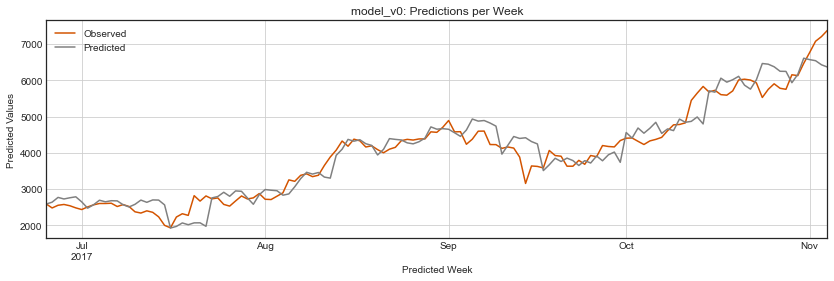

RMSE: 354.12
MAPE: 6.84%


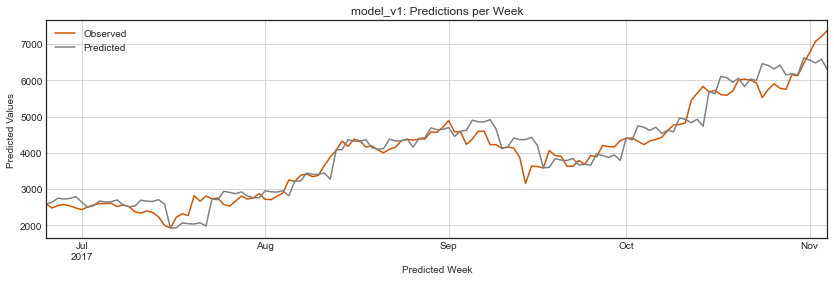

RMSE: 355.90
MAPE: 6.61%


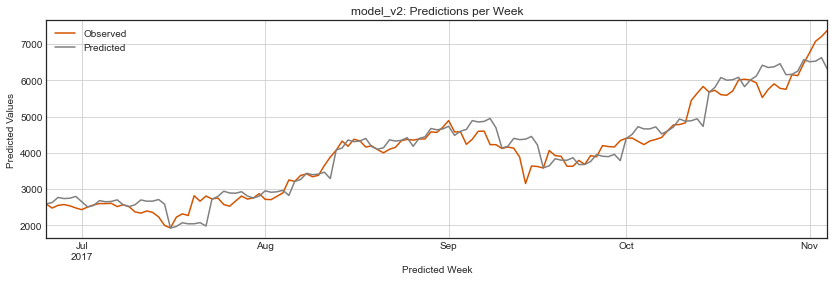

RMSE: 352.60
MAPE: 6.55%


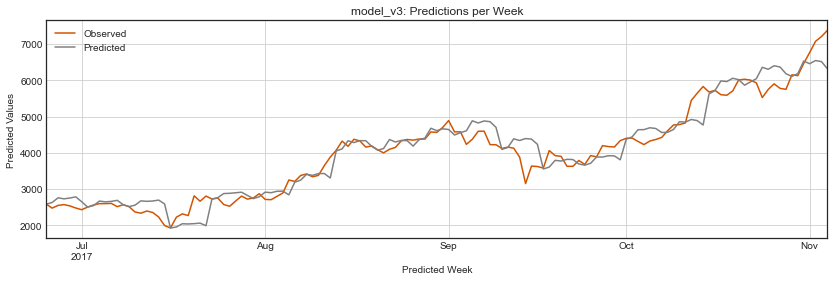

RMSE: 345.32
MAPE: 6.41%


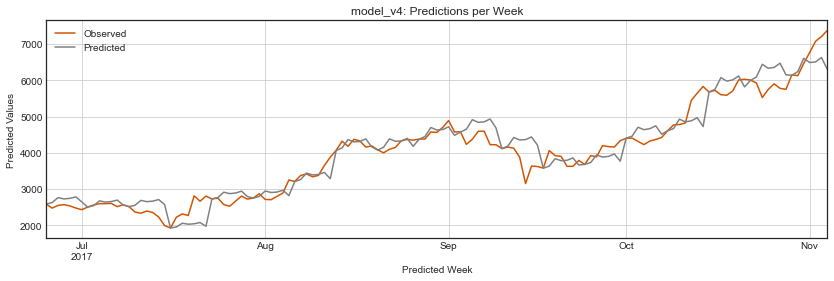

RMSE: 352.37
MAPE: 6.52%


In [31]:
#  Evaluate each model trained in this activity in sequence
models = [model_vo, model_v1, model_v2, model_v3, model_v4]
for i, M in enumerate(models):
    predicted_days = evaluate_model(M, kind='series')
    plot_weekly_predictions(predicted_days, f'model_v{i}')